### Simulation

In [1]:
# import libraries
from single_simulation import run_single_simulation

In [2]:
# run the simulation
gdf_county, gdf_census = run_single_simulation(grid_side_length=7,county_autocorrelation="positive", census_autocorrelation="positive", random_seed=42,variable_name='Rate_cen')

max value: 4.5841506734405995
max value: 4.5841506734405995
max value: 5.961693315162728
max value: 5.961693315162728
max value: 1.6859824242365067
max value: 1.6859824242365067
max value: 1.5730136914501782
max value: 1.5730136914501782
max value: 1.459303277351614
max value: 1.459303277351614
max value: 1.911826830281271
max value: 1.911826830281271
max value: 1.747433492331359
max value: 1.747433492331359
max value: 0.5391586691221446
max value: 0.5391586691221446
max value: 1.383643403470751
max value: 1.383643403470751
max value: 1.2063589065843072
max value: 1.2063589065843072
max value: 5.555799649788183
max value: 5.555799649788183
max value: 2.5310048898250437
max value: 2.5310048898250437
max value: 3.8789639314195505
max value: 3.8789639314195505
max value: 1.3376000053230188
max value: 1.3376000053230188
max value: 0.3230330209495713
max value: 0.3230330209495713
max value: 0.45230364342805784
max value: 0.45230364342805784
max value: 3.2460202895051724
max value: 3.2460202

In [3]:
gdf_county.head()

,Index_county,Rate_cou,geometry,up_AL,up_AML,up_TL,up_TML,down_AL,down_AML,down_TL,down_TML,cencus_count
0,0,16.056498,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",4.123023,2.061511,12.369069,6.184534,3.687429,1.843715,11.062287,5.531144,4.0
1,1,16.371808,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",4.729209,2.364605,14.187628,7.093814,2.184180,1.092090,6.552540,3.276270,4.0
2,2,16.780932,"POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))",1.087073,0.543537,16.306102,8.153051,0.667049,0.333524,10.005733,5.002867,16.0
3,3,16.473685,"POLYGON ((3 0, 4 0, 4 1, 3 1, 3 0))",1.083975,0.541988,16.259626,8.129813,0.479353,0.239676,7.190291,3.595146,16.0
4,4,15.552689,"POLYGON ((4 0, 5 0, 5 1, 4 1, 4 0))",0.648449,0.324224,15.562774,7.781387,0.342644,0.171322,8.223455,4.111728,25.0


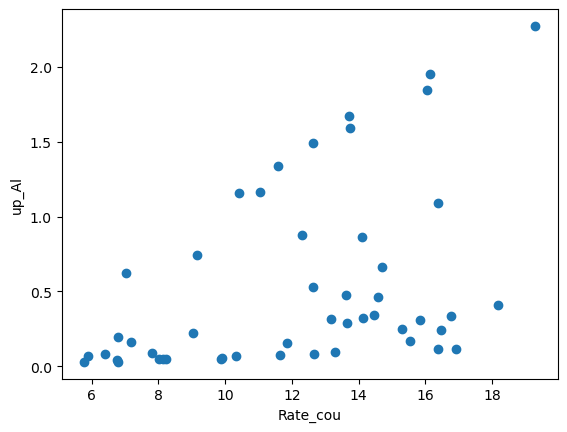

In [4]:
# plot Rate_cou agaiinst up_Al in in gdf_county
import matplotlib.pyplot as plt
plt.scatter(gdf_county['Rate_cou'], gdf_county['down_AML'])
plt.xlabel('Rate_cou')
plt.ylabel('up_Al')
plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_901/1147308056.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.linspace(0, 20, 100), model.params[0] + model.params[1] * np.linspace(0, 20, 100), color='red')


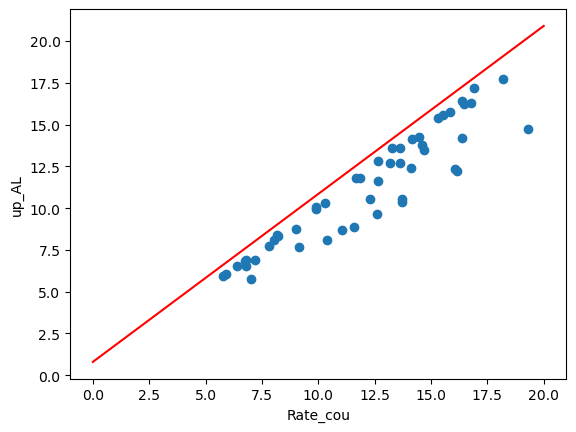

In [5]:
# create a regression model to predict Rate_cou from up_AL
import statsmodels.api as sm
X = gdf_county['up_TL']
y = gdf_county['Rate_cou']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

# plot the regression line
import numpy as np
plt.scatter(gdf_county['Rate_cou'], gdf_county['up_TL'])
plt.xlabel('Rate_cou')
plt.ylabel('up_AL')
plt.plot(np.linspace(0, 20, 100), model.params[0] + model.params[1] * np.linspace(0, 20, 100), color='red')
plt.show()

In [6]:
gdf_census

,Index_census,Rate_cen,geometry,Index_county
0,0,3.765380,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",0
1,1,3.687429,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",0
2,2,4.019538,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",0
3,3,4.584151,"POLYGON ((1 1, 2 1, 2 2, 1 2, 1 1))",0
4,0,2.184180,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",1
...,...,...,...,...
1136,48,0.224380,"POLYGON ((6 6, 7 6, 7 7, 6 7, 6 6))",47
1137,0,4.549432,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))",48
1138,1,4.779993,"POLYGON ((1 0, 2 0, 2 1, 1 1, 1 0))",48
1139,2,4.976517,"POLYGON ((0 1, 1 1, 1 2, 0 2, 0 1))",48


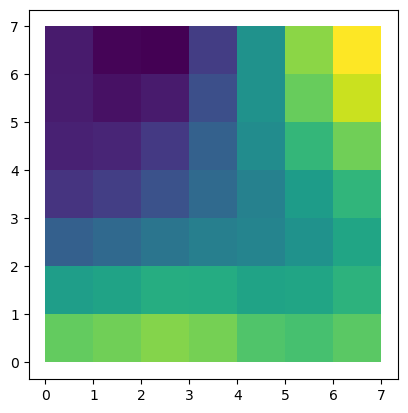

In [7]:
# plot the gdf_county Rate_cou with geometry

gdf_county.plot(column='Rate_cou', legend=False)
plt.show()



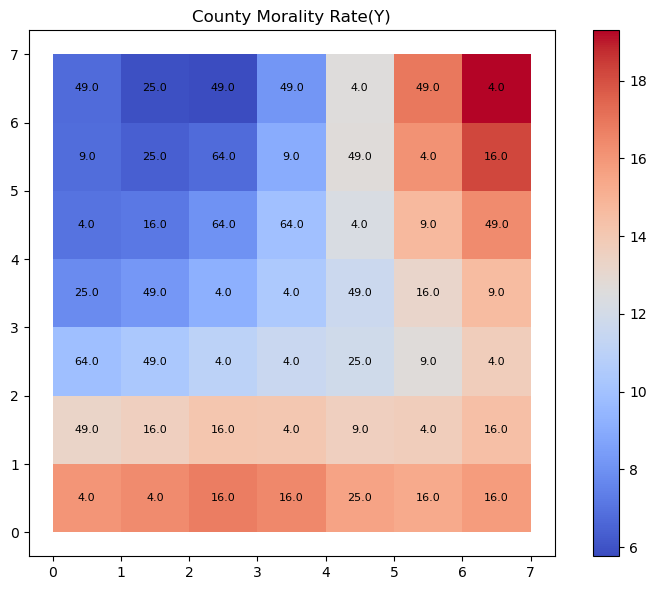

In [8]:
import matplotlib.pyplot as plt

# Create a figure with a single axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the county DataFrame using the 'Rate_cou' column
gdf_county.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=ax)

# Annotate each county with its census tract count (assumed stored in 'cencus_count')
for idx, row in gdf_county.iterrows():
    centroid = row.geometry.centroid  # Compute the centroid of the county geometry
    ax.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )

ax.set_title("County Morality Rate(Y)")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
# import matplotlib.pyplot as plt

# # List of columns to plot
# columns = [
#     "Rate_cou", "up_AL", "up_AML", "up_TL", "up_TML",
#     "down_AL", "down_AML", "down_TL", "down_TML"
# ]

# # Create a 3x3 grid for the maps
# fig, axs = plt.subplots(3, 3, figsize=(18, 12))
# axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

# for ax, col in zip(axs, columns):
#     # Plot the county DataFrame for the specified column
#     gdf_county.plot(column=col, cmap="coolwarm", legend=True, ax=ax)
    
#     # Annotate each county with its census tract count (assumed to be in 'cencus_count')
#     for idx, row in gdf_county.iterrows():
#         centroid = row.geometry.centroid  # Calculate the centroid of the county
#         ax.annotate(
#             text=str(row['cencus_count']),
#             xy=(centroid.x, centroid.y),
#             horizontalalignment="center",
#             verticalalignment="center",
#             fontsize=8,
#             color="black"
#         )
#     ax.set_title(col)

# plt.tight_layout()
# plt.show()


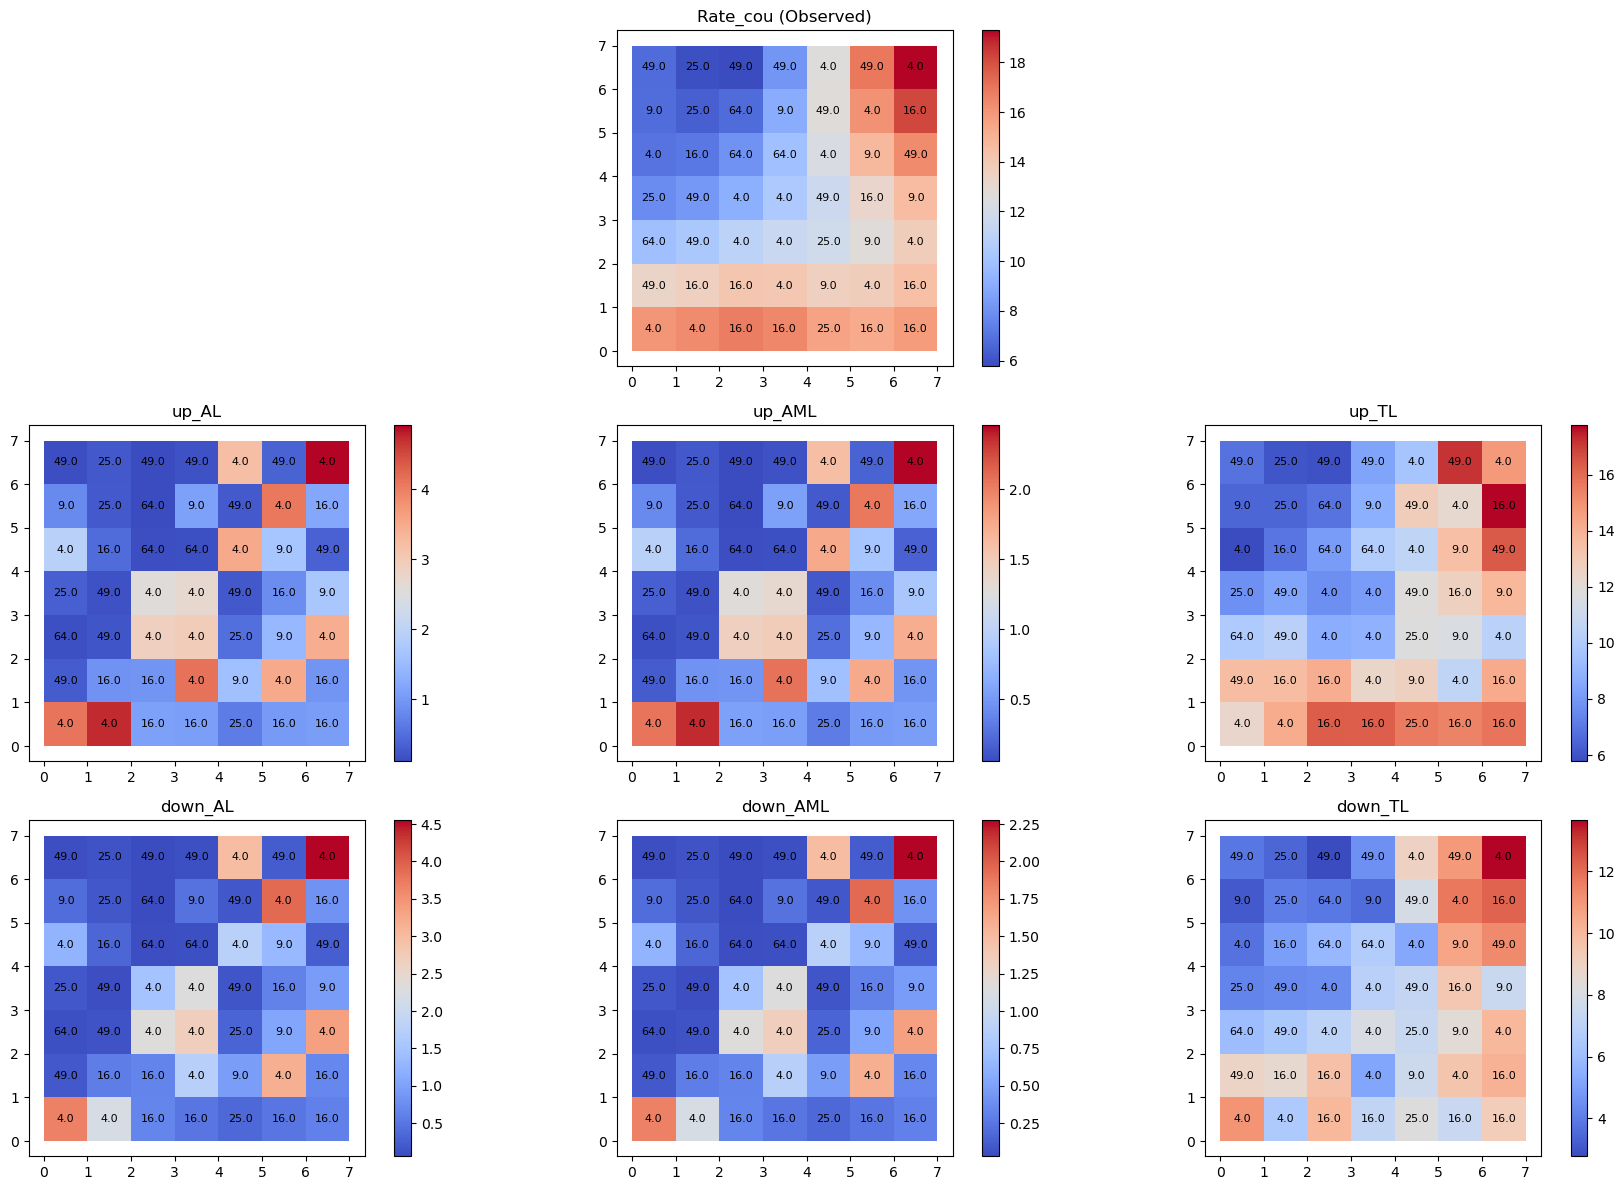

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure with a GridSpec layout: 3 rows and 3 columns.
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

# -------------------------------
# Top Row: Plot Rate_cou in the center cell (middle column)
# -------------------------------
ax_rate = fig.add_subplot(gs[0, 1])
gdf_county.plot(column='Rate_cou', cmap='coolwarm', legend=True, ax=ax_rate)
for idx, row in gdf_county.iterrows():
    centroid = row.geometry.centroid
    ax_rate.annotate(
        text=str(row['cencus_count']),
        xy=(centroid.x, centroid.y),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=8,
        color='black'
    )
ax_rate.set_title("Rate_cou (Observed)")

# -------------------------------
# Middle Row: Plot 3 "up" methods
# -------------------------------
up_columns = ['up_AL', 'up_AML', 'up_TL']
up_axes = [fig.add_subplot(gs[1, i]) for i in range(3)]
for ax, col in zip(up_axes, up_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

# -------------------------------
# Bottom Row: Plot 3 "down" methods
# -------------------------------
down_columns = ['down_AL', 'down_AML', 'down_TL']
down_axes = [fig.add_subplot(gs[2, i]) for i in range(3)]
for ax, col in zip(down_axes, down_columns):
    gdf_county.plot(column=col, cmap='coolwarm', legend=True, ax=ax)
    for idx, row in gdf_county.iterrows():
        centroid = row.geometry.centroid
        ax.annotate(
            text=str(row['cencus_count']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            color='black'
        )
    ax.set_title(col)

plt.tight_layout()
plt.show()
